<a href="https://colab.research.google.com/github/Nhutsang/Finalproject/blob/main/ProjectAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray,save
from sklearn.model_selection import train_test_split
from time import time
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy
import random

In [4]:
import os
import cv2
import numpy as np

data_folder = '/content/drive/MyDrive/database/datatrain/'
categories = ['Dogs', 'Cats', 'Hamster']

X = []
y = []

# Đọc và chuyển đổi ảnh thành ma trận numpy
for category in categories:
    category_dir = os.path.join(data_folder, category)
    for image_file in os.listdir(category_dir):
        image_path = os.path.join(category_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.resize(image, (40,40))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        X.append(image)
        y.append(categories.index(category))

# Chuyển đổi danh sách thành mảng numpy
X = np.array(X)
y = np.array(y)

# In thông tin của X_train và y_train
print('Kích thước X_train:', X.shape)
print('kich thuoc y:', y.shape)

Kích thước X_train: (6116, 40, 40, 3)
kich thuoc y: (6116,)


In [5]:
X = X.astype('float32')/255.0
print(X.shape)

(6116, 40, 40, 3)


In [6]:
X_train_val, X_test , y_train_val , y_test = train_test_split(X, y , test_size = 0.1)
X_train , X_val , y_train , y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2)

In [7]:

print('Kích thước X_train:', X_train.shape)
print('kich thuoc y_train:', y_train.shape)

print('Kích thước X_val:', X_val.shape)
print('kich thuoc y_val:', y_val.shape)

print('Kích thước X_test:', X_test.shape)
print('kich thuoc y_test:', y_test.shape)

Kích thước X_train: (4403, 40, 40, 3)
kich thuoc y_train: (4403,)
Kích thước X_val: (1101, 40, 40, 3)
kich thuoc y_val: (1101,)
Kích thước X_test: (612, 40, 40, 3)
kich thuoc y_test: (612,)


In [8]:
 #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
trainY = to_categorical (y_train)
testY=to_categorical(y_test)
valY=to_categorical(y_val)

print(trainY.shape)
print(testY.shape)
print(valY.shape)
trainY[0]


(4403, 3)
(612, 3)
(1101, 3)


array([0., 1., 0.], dtype=float32)

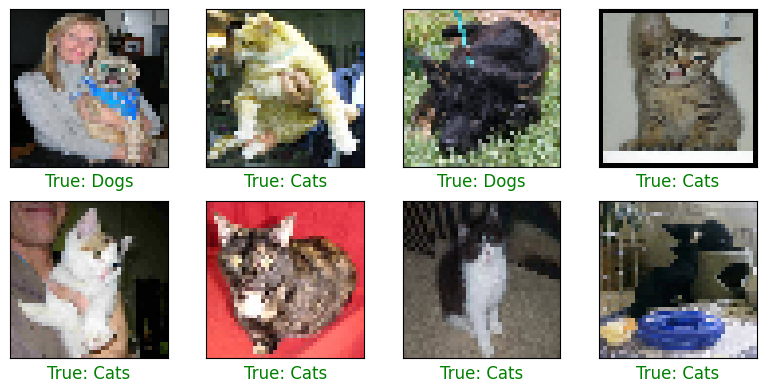

In [11]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None :
  nrows, ncols = 2 ,4 
  fig, axes = plt.subplots(nrows, ncols , figsize = (8,4))
  len_x = x_data.shape[0]
  for idx  in range(nrows*ncols):
    ax = axes[idx // ncols , idx % ncols]
    img_idx = random.randint(0, len_x)

    ax.imshow(x_data[img_idx], cmap = 'gray')
    ax.set(xticks = [], yticks = [])

    true_label_str = f"True: {categories[y_data[img_idx]]}"
    ax.set_xlabel(true_label_str, color = 'green', fontsize = 12 )

  plt.tight_layout()
  plt.show()
plot_data(X_train , y_train)

In [13]:
batch_size = 32
classes = 3
model = Sequential()

# bộ 1 VGG
model.add(Conv2D(32, kernel_size=(3,3), activation = 'tanh', input_shape=(40,40,3),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# Bộ 2 VGG
model.add(Conv2D(64,(3,3) , activation = 'tanh' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))

# Bộ 3 VGG
model.add(Conv2D(128,(3,3) , activation = 'tanh' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))




# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(128, activation = 'tanh'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes , activation = 'softmax'))     



model.compile( loss= categorical_crossentropy , optimizer = Adam() , metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                    

In [14]:
start = time()
train = model.fit(X_train, trainY, batch_size ,epochs= 50, verbose = 1, validation_data=(X_val, valY))

Epoch 1/50
138/138 [==============================] - 10s 11ms/step - loss: 0.8006 - accuracy: 0.5383 - val_loss: 0.8910 - val_accuracy: 0.5486
Epoch 2/50
138/138 [==============================] - 1s 7ms/step - loss: 0.7220 - accuracy: 0.6405 - val_loss: 0.7606 - val_accuracy: 0.6158
Epoch 3/50
138/138 [==============================] - 1s 7ms/step - loss: 0.6390 - accuracy: 0.7061 - val_loss: 0.6709 - val_accuracy: 0.6966
Epoch 4/50
138/138 [==============================] - 1s 6ms/step - loss: 0.5768 - accuracy: 0.7456 - val_loss: 0.6670 - val_accuracy: 0.7021
Epoch 5/50
138/138 [==============================] - 1s 6ms/step - loss: 0.5163 - accuracy: 0.7797 - val_loss: 0.6522 - val_accuracy: 0.7066
Epoch 6/50
138/138 [==============================] - 1s 5ms/step - loss: 0.4504 - accuracy: 0.8135 - val_loss: 0.5986 - val_accuracy: 0.7393
Epoch 7/50
138/138 [==============================] - 1s 5ms/step - loss: 0.3789 - accuracy: 0.8417 - val_loss: 0.5986 - val_accuracy: 0.7484
Epoc

In [20]:
model.save('/content/drive/MyDrive/database/a/my_model.h5')

Text(0.5, 0, 'Epoch')

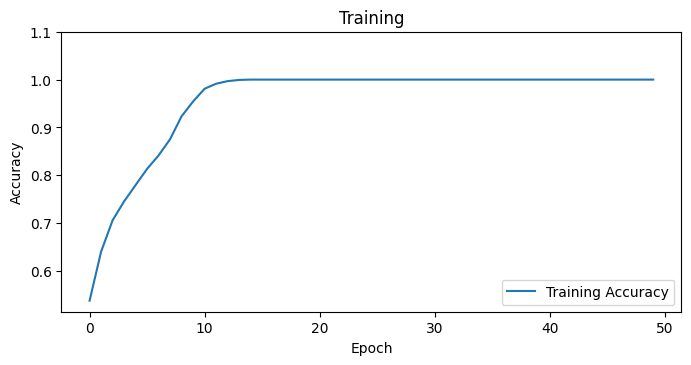

In [17]:
acc=train.history['accuracy']
val_acc=train.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
#plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.1])
plt.title('Training')
plt.xlabel('Epoch')

1/1 [==============================] - 0s 195ms/step
True Label: Cats
Predicted Label: Cats


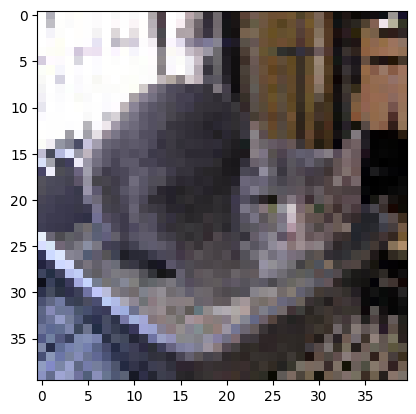

In [18]:
# Lấy một hình ảnh từ tập test
id = 200
image = X_test[id]
label = y_test[id]
classname= {0:'Dogs', 1:'Cats', 2:'Hamster'} 

# Đưa hình ảnh về đúng kích thước và định dạng phù hợp
image = np.expand_dims(image , axis=0)

# Dự đoán nhãn của hình ảnh sử dụng mô hình
predictions = model.predict(image)

# Chuyển đổi dự đoán thành nhãn tương ứng dựa trên xác suất lớn nhất
predicted_label = np.argmax(predictions)

# In kết quả dự đoán
print('True Label:', classname[label])
print('Predicted Label:', classname[predicted_label])
plt.imshow(X_test[id])

In [19]:

correct_predictions = 0
total_predictions = 0

for i in range(0,100):
  img = X_test[i]
  # Đưa hình ảnh về đúng kích thước và định dạng phù hợp
  image = np.expand_dims(img , axis=0)  
  
  # Dự đoán nhãn của hình ảnh sử dụng mô hình
  predictions = model.predict(image)
  # Chuyển đổi dự đoán thành nhãn tương ứng dựa trên xác suất cao nhất
  predicted_label = np.argmax(predictions)

  # Kiểm tra xem dự đoán có đúng hay không
  truelabel = y_test[i]
  if predicted_label == truelabel:
    correct_predictions += 1

accuracy = (correct_predictions/100)*100
print("Accuracy:", accuracy , "%")


1/1 [==============================] - 0s 26ms/step
Accuracy: 74.0 %
